In [21]:
# 支持向量机 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

# Use seaborn plotting defaults 

import seaborn as sns;sns.set()


In [98]:
### 例子 
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=50,centers=2,random_state=0
               ,cluster_std=0.6)

In [99]:
X.shape

(50, 2)

In [100]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0])

In [101]:
y.shape

(50,)

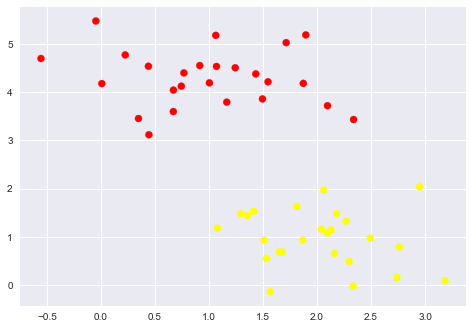

In [102]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

(-1, 3.5)

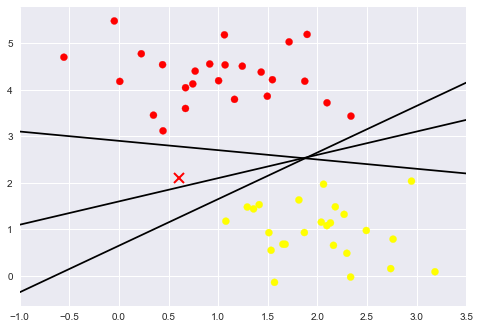

In [103]:
xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
    
plt.xlim(-1,3.5)

In [104]:
### Support Vector Machines: 最小化 雷区 

(-1, 3.5)

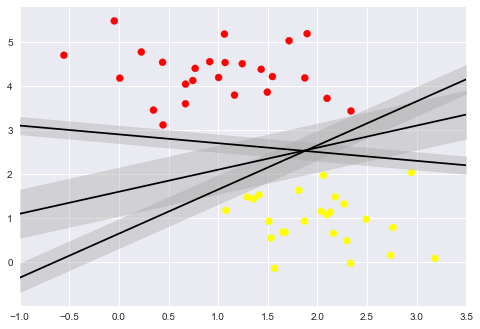

In [105]:
xfit=np.linspace(-1,3.5) 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)

plt.xlim(-1,3.5)


In [106]:
### 训练一个基本的SVM 

In [112]:
from sklearn.svm import SVC # 'Support vector classifier'
model=SVC(kernel='linear')
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
#绘图函数 
def plot_svc_decision_function(model,ax=None,plot_support=True):
    """ Plot the decision function for a 2D SVC"""
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    # create grid to evaluate model 
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    # plt decision boundary and marginx 
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    # plot support vectors 
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                  s=300,linewidth=1,facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

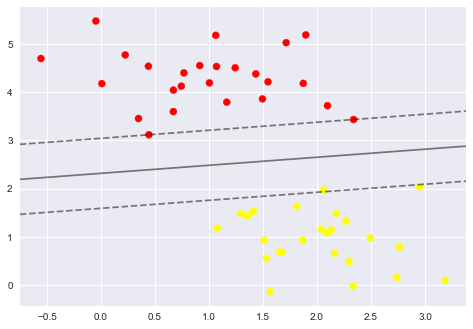

In [121]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)

In [122]:
model.support_vectors_

array([[ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 2.06156753,  1.96918596]])

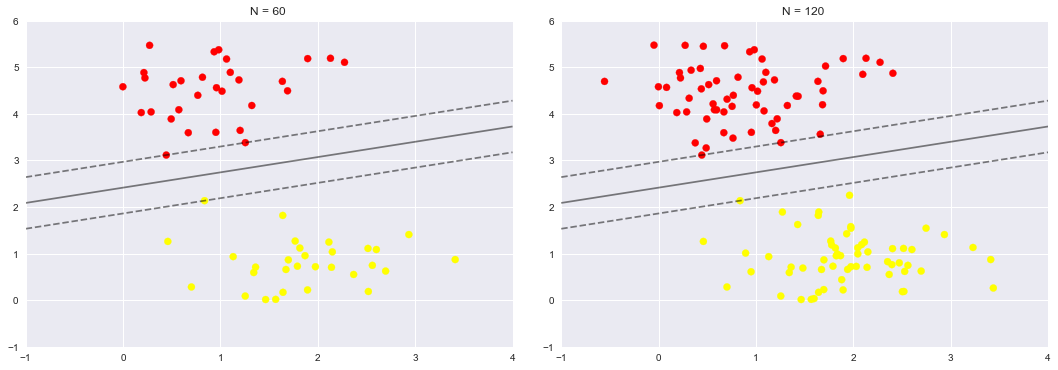

In [130]:
def plot_svm(N=100,ax=None):
    X,y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.60)
    X=X[:N]
    y=y[:N]
    model=SVC(kernel='linear',C=1E10)
    model.fit(X,y)
    
    ax=ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc_decision_function(model,ax)

fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi,N in zip(ax,[60,120]):
    plot_svm(N,axi)
    axi.set_title('N = {0} '.format(N))
    


In [131]:
### 引入核函数的SVM

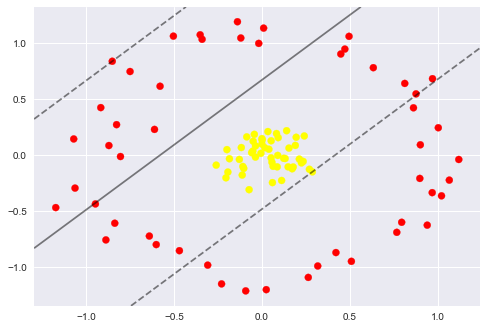

In [138]:
from sklearn.datasets.samples_generator import make_circles
X,y=make_circles(100,factor=0.1,noise=0.1)

clf=SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)


In [136]:
X.shape

(100, 2)

In [137]:
y.shape

(100,)

In [139]:
# 利用核变换 加入新的维度 

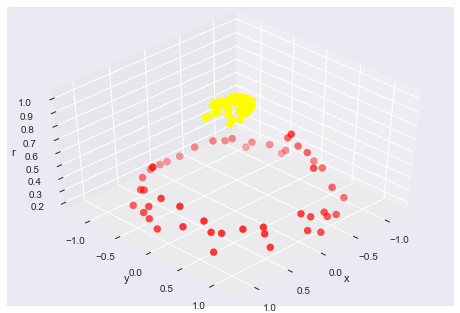

In [144]:
from mpl_toolkits import mplot3d
r=np.exp(-(X**2).sum(1))
def plot_3d(elev=30,azim=30,X=X,y=y):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='autumn')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
plot_3d(elev=45,azim=45,X=X,y=y)

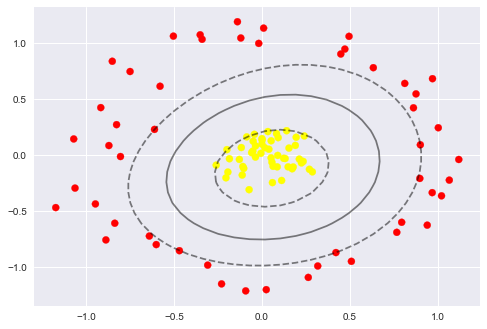

In [156]:
# 加入径向基函数
clf=SVC(kernel='rbf',C=1E6)
clf.fit(X,y)
# 这回牛逼了 ！
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf)

plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=300,lw=1,facecolors='none')
